Import the necessary libraries.

In [2]:
import csv
import numpy as np
from numpy import dot
from numpy.linalg import norm
from sklearn.feature_extraction.text import TfidfVectorizer
from create_input_lists import create_input_lists_from_csv, lemmatize
from statistics import mean
from sklearn.metrics.pairwise import cosine_similarity, euclidean_distances
from statistics import mean, median, mode
import matplotlib.pyplot as plt
import math
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from collections import defaultdict, Counter

Obtain and pre-process the texts.

In [3]:
paragraph_path = './OneDrive-2020-12-04/gen_chem/paragraphs.csv'
assessment_path = './OneDrive-2020-12-04/gen_chem/assessments.csv'

In [4]:
para_ids, lemm_para, orig_para, assess_ids, lemma_assess, orig_assess = create_input_lists_from_csv(paragraph_path, assessment_path)

Obtain the lengths of all assessments and paragraphs.

In [5]:
assessment_lengths = []
for assessment in lemma_assess:
    assessment_lengths.append(len(assessment))
    
paragraph_lengths = []
for paragraph in lemm_para:
    paragraph_lengths.append(len(paragraph))

Output the statistics for the paragraph and assessment lengths.

In [6]:
min_assessment_length = min(assessment_lengths)
max_assessment_length = max(assessment_lengths)
mean_assessment_length = 0 if len(assessment_lengths) == 0 else sum(assessment_lengths)/len(assessment_lengths)

print('Minimum Length of an Assessment:', min_assessment_length)
print('Maximum Length of an Assessment:', max_assessment_length)
print(f'Mean Length of an Assessment: {(mean_assessment_length):.2f}\n')

min_paragraph_length = min(paragraph_lengths)
max_paragraph_length = max(paragraph_lengths)
mean_paragraph_length = 0 if len(paragraph_lengths) == 0 else sum(paragraph_lengths)/len(paragraph_lengths)

print('Minimum Length of a Paragraph:', min_paragraph_length)
print('Maximum Length of a Paragraph:', max_paragraph_length)
print(f'Mean Length of a Paragraph: {(mean_paragraph_length):.2f}')

Minimum Length of an Assessment: 1
Maximum Length of an Assessment: 1262
Mean Length of an Assessment: 217.12

Minimum Length of a Paragraph: 1
Maximum Length of a Paragraph: 1262
Mean Length of a Paragraph: 158.30


Obtain the TF-IDF vectorization of the texts.

In [4]:
vectorizer = TfidfVectorizer(use_idf=True, stop_words = 'english')
para_vectors = vectorizer.fit_transform(lemm_para)
assess_vectors = vectorizer.fit_transform(lemma_assess)

In [5]:
print(para_vectors.shape)
print(assess_vectors.shape)

(2860, 3967)
(1275, 2054)


In [6]:
para_nonzero_counts = []
for vector in para_vectors:
    para_nonzero_counts.append(vector.count_nonzero())

assess_nonzero_counts = []
for vector in assess_vectors:
    assess_nonzero_counts.append(vector.count_nonzero())

Output Summary Statistics of Vectorizations:

In [7]:
print('TF-IDF for Paragraphs:\n')
print('Average Number of Non-Zeros:', mean(para_nonzero_counts))
print('Total # of Dimensions:', para_vectors.shape[1])


print('\n\nTF-IDF for Assessments:\n')
print('Average Number of Non-Zeros:', mean(assess_nonzero_counts))
print('Total # of Dimensions:', assess_vectors.shape[1])

TF-IDF for Paragraphs:

Average Number of Non-Zeros: 14.467832167832167
Total # of Dimensions: 3967


TF-IDF for Assessments:

Average Number of Non-Zeros: 15.054117647058824
Total # of Dimensions: 2054


In [8]:
def plot_distances(distances_list):
    plt.hist(distances_list, rwidth = 0.8, bins=np.arange(min(distances_list), max(distances_list) + 0.01, 0.01))
    plt.xlabel('Pairwise Distance',fontsize=10)
    plt.ylabel('Frequency',fontsize=10)
    plt.xticks(fontsize=6)
    plt.yticks(fontsize=6)
    plt.xticks(np.arange(min(distances_list), max(distances_list)+0.1, 0.1))
    plt.grid()
    plt.show()
    
def plot_similarities(cos_sim_list):
    plt.hist(cos_sim_list, rwidth = 0.8, bins=np.arange(min(cos_sim_list), max(cos_sim_list) + 0.01, 0.01))
    plt.xlabel('Pairwise Cosine Similarity',fontsize=10)
    plt.ylabel('Frequency',fontsize=10)
    plt.xticks(fontsize=6)
    plt.yticks(fontsize=6)
    plt.xticks(np.arange(min(cos_sim_list), max(cos_sim_list)+0.1, 0.1))
    plt.grid()
    plt.show()
    
def calculate_pairwise_metrics(pairs):    
    cos_sim_list = []
    dist_list = []
    orthogonal_count = 0
    for pair in pairs:
        a,b = pair
        a = np.array(a)
        b = np.array(b)
        cos_sim = dot(a, b)/(norm(a)*norm(b))
        cos_sim_list.append(cos_sim)

        if cos_sim == 0:
            orthogonal_count += 1

        dist = norm(a - b)
        dist_list.append(dist)
    
    return(cos_sim_list, orthogonal_count, dist_list)

def print_similarity_statistics(sim_list):
    sim_list = [x for x in sim_list if math.isnan(x) == False]
    print('Cosine Similarity Mean:', mean(sim_list))
    print('Cosine Similarity Median:', median(sim_list))
    print('Cosine Similarity Mode:', mode(sim_list))
    print('Cosine Similarity Min:', min(sim_list))
    print('Cosine Similarity Max:', max(sim_list))
    
def print_distance_statistics(dist_list):
    dist_list = [x for x in dist_list if math.isnan(x) == False]
    print('Euclidean Distance Mean:', mean(dist_list))
    print('Euclidean Distance Median:', median(dist_list))
    print('Euclidean Distance Mode:', mode(dist_list))
    print('Euclidean Distance Min:', min(dist_list))
    print('Euclidean Distance Max:', max(dist_list))

<ipython-input-8-e90b1626ce59>:29: RuntimeWarning: invalid value encountered in double_scalars
  cos_sim = dot(a, b)/(norm(a)*norm(b))


Cosine Similarity Mean: 0.02345201154690224
Cosine Similarity Median: 0.0
Cosine Similarity Mode: 0.0
Cosine Similarity Min: 0.0
Cosine Similarity Max: 1.0000000000000002

Number of Pairs: 4088370
Number of Orthogonal Pairs: 2956165


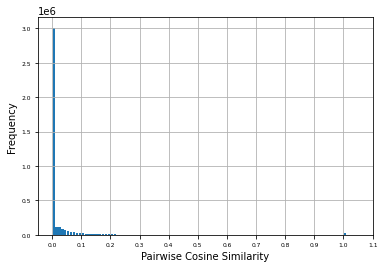

Euclidean Distance Mean: 1.362302624815099
Euclidean Distance Median: 1.4142135623730951
Euclidean Distance Mode: 1.4142135623730951
Euclidean Distance Min: 0.0
Euclidean Distance Max: 1.4142135623730956


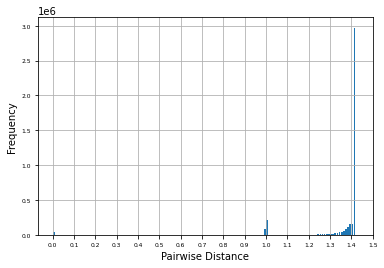

In [9]:
para_vectors = para_vectors.toarray().tolist()

para_pairs = [[a, b] for idx, a in enumerate(para_vectors) for b in para_vectors[idx + 1:]]

para_sim_list, para_count, para_dist_list = calculate_pairwise_metrics(para_pairs)
print_similarity_statistics(para_sim_list)
print('\nNumber of Pairs:', len(para_pairs))
print('Number of Orthogonal Pairs:', para_count)
plot_similarities(para_sim_list)

print_distance_statistics(para_dist_list)
plot_distances(para_dist_list)

<ipython-input-8-e90b1626ce59>:29: RuntimeWarning: invalid value encountered in double_scalars
  cos_sim = dot(a, b)/(norm(a)*norm(b))


Cosine Similarity Mean: 0.05454221113602793
Cosine Similarity Median: 0.0
Cosine Similarity Mode: 0.0
Cosine Similarity Min: 0.0
Cosine Similarity Max: 1.0000000000000002

Number of Pairs: 812175
Number of Orthogonal Pairs: 480791
Percentage of Orthogonal Pairs: 0.5919795610551913


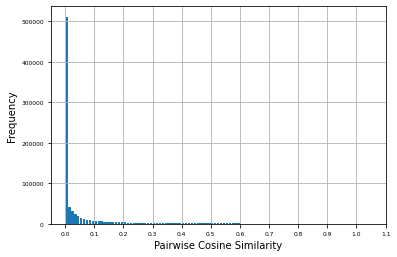

Euclidean Distance Mean: 1.3699166113819525
Euclidean Distance Median: 1.414213562373095
Euclidean Distance Mode: 1.4142135623730951
Euclidean Distance Min: 0.0
Euclidean Distance Max: 1.4142135623730956


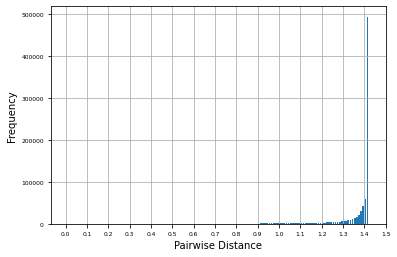

In [10]:
assess_vectors = assess_vectors.toarray().tolist()

assess_pairs = [[a, b] for idx, a in enumerate(assess_vectors) for b in assess_vectors[idx + 1:]]

assess_sim_list, assess_count, assess_dist_list = calculate_pairwise_metrics(assess_pairs)
print_similarity_statistics(assess_sim_list)
print('\nNumber of Pairs:', len(assess_pairs))
print('Number of Orthogonal Pairs:', assess_count)
print('Percentage of Orthogonal Pairs:', assess_count/len(assess_pairs))
plot_similarities(assess_sim_list)

print_distance_statistics(assess_dist_list)
plot_distances(assess_dist_list)

In [11]:
km = KMeans(n_clusters = 200, max_iter = 50000, init = 'k-means++')
cluster_assignment = km.fit(assess_vectors).labels_
s = silhouette_score(assess_vectors, cluster_assignment, metric='euclidean')
print(s)

0.10021770218102821


In [12]:
clusterIndex_to_clusteredText1 = defaultdict(lambda: " ")
text_id1_to_clusterIndex = dict()

for i, clusterIndex in enumerate(cluster_assignment): # len(cluster_assignment) is equal to len(vectors)
    clusterIndex_to_clusteredText1[clusterIndex] += orig_assess[i] + ". " 
    text_id1_to_clusterIndex[assess_ids[i]] = clusterIndex
    
print(clusterIndex_to_clusteredText1[0])

 What are the spectator ions in the complete ionic equation below? $$2\mathrm{Na}^+(\mathrm{aq})\;+2\mathrm{Cl}^-(aq)+2{\mathrm H}_2\mathrm O(l)\;\rightarrow\;\;2\mathrm{Na}^+(\mathrm{aq})\;+\;2\mathrm{OH}^-(aq)+{\mathrm H}_2(g)+{\mathrm{Cl}}_2(g)$$ $$\mathrm{Na}^+(\mathrm{aq})$$ Correct _ Spectator ions are those ions that remain unchanged from the reactant to the product side of the equation _ Spectator ions are exactly the same on both sides of the equation.. Which of the following is the balanced net ionic equation for the complete ionic equation below? $$2\mathrm{Na}^+(\mathrm{aq})\;+2\mathrm{Cl}^-(aq)+2{\mathrm H}_2\mathrm O(l)\;\rightarrow\;\;2\mathrm{Na}^+(\mathrm{aq})\;+\;2\mathrm{OH}^-(aq)+{\mathrm H}_2(g)+{\mathrm{Cl}}_2(g)$$ $$2\mathrm{Cl}^-(aq)+2{\mathrm H}_2\mathrm O(l)\;\rightarrow\;2\mathrm{OH}^-(aq)+{\mathrm H}_2(g)+{\mathrm{Cl}}_2(g)$$ Correct _ Remove the spectator ions from the complete ionic equation to obtain the net ionic equation _ Remove spectator ions _ Keep c

In [13]:
print(type(clusterIndex_to_clusteredText1))

<class 'collections.defaultdict'>


<ipython-input-8-e90b1626ce59>:29: RuntimeWarning: invalid value encountered in double_scalars
  cos_sim = dot(a, b)/(norm(a)*norm(b))


Cosine Similarity Mean: 0.052417035695202625
Cosine Similarity Median: 0.0
Cosine Similarity Mode: 0.0
Cosine Similarity Min: 0.0
Cosine Similarity Max: 0.9617053721640573

Number of Pairs: 777455
Number of Orthogonal Pairs: 462182
Percentage of Orthogonal Pairs: 0.5944807094944402


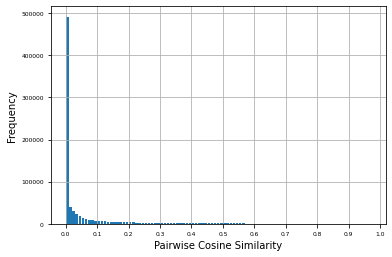

Euclidean Distance Mean: 1.3721397136583162
Euclidean Distance Median: 1.414213562373095
Euclidean Distance Mode: 1.4142135623730951
Euclidean Distance Min: 0.2767476389635252
Euclidean Distance Max: 1.4142135623730956


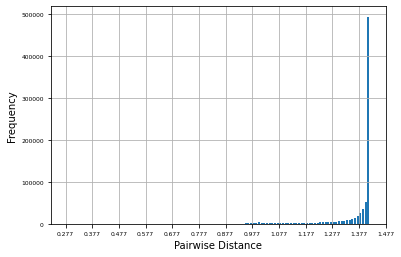

In [14]:
assess_pair_ids = [[a, b] for idx, a in enumerate(assess_ids) for b in assess_ids[idx + 1:]]

inter_cluster_pairs = []
for index in range(0,len(assess_pairs)):
    a, b = assess_pairs[index]
    a_id, b_id = assess_pair_ids[index]
    a_cluster = text_id1_to_clusterIndex[a_id]
    b_cluster = text_id1_to_clusterIndex[b_id]
    if a_cluster != b_cluster:
        inter_cluster_pairs.append([a,b])
    
cluster_sim_list, cluster_count, cluster_dist_list = calculate_pairwise_metrics(inter_cluster_pairs)
print_similarity_statistics(cluster_sim_list)
print('\nNumber of Pairs:', len(inter_cluster_pairs))
print('Number of Orthogonal Pairs:', cluster_count)
print('Percentage of Orthogonal Pairs:', cluster_count/len(inter_cluster_pairs))
plot_similarities(cluster_sim_list)

print_distance_statistics(cluster_dist_list)
plot_distances(cluster_dist_list)

<ipython-input-8-e90b1626ce59>:29: RuntimeWarning: invalid value encountered in double_scalars
  cos_sim = dot(a, b)/(norm(a)*norm(b))


Cosine Similarity Mean: 0.10267265218626535
Cosine Similarity Median: 0.0
Cosine Similarity Mode: 0.0
Cosine Similarity Min: 0.0
Cosine Similarity Max: 1.0000000000000002

Number of Pairs: 34720
Number of Orthogonal Pairs: 18609
Percentage of Orthogonal Pairs: 0.5359735023041474


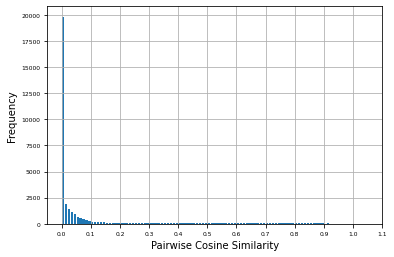

Euclidean Distance Mean: 1.3201366004294666
Euclidean Distance Median: 1.414213562373095
Euclidean Distance Mode: 1.4142135623730951
Euclidean Distance Min: 0.0
Euclidean Distance Max: 1.4142135623730954


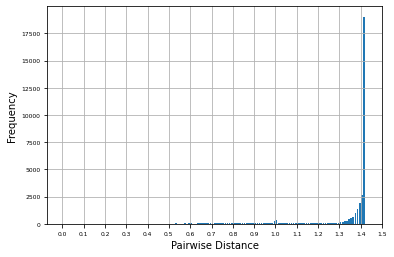

In [15]:
intra_cluster_pairs = []
for index in range(0,len(assess_pairs)):
    a, b = assess_pairs[index]
    a_id, b_id = assess_pair_ids[index]
    a_cluster = text_id1_to_clusterIndex[a_id]
    b_cluster = text_id1_to_clusterIndex[b_id]
    if a_cluster == b_cluster:
        intra_cluster_pairs.append([a,b])
    
cluster_sim_list, cluster_count, cluster_dist_list = calculate_pairwise_metrics(intra_cluster_pairs)
print_similarity_statistics(cluster_sim_list)
print('\nNumber of Pairs:', len(intra_cluster_pairs))
print('Number of Orthogonal Pairs:', cluster_count)
print('Percentage of Orthogonal Pairs:', cluster_count/len(intra_cluster_pairs))
plot_similarities(cluster_sim_list)

print_distance_statistics(cluster_dist_list)
plot_distances(cluster_dist_list)

In [16]:
Counter(cluster_assignment)

Counter({137: 243,
         107: 1,
         89: 3,
         92: 1,
         152: 3,
         68: 4,
         186: 2,
         184: 4,
         134: 4,
         188: 4,
         167: 7,
         95: 3,
         20: 4,
         194: 4,
         34: 3,
         189: 3,
         174: 5,
         80: 40,
         71: 1,
         156: 2,
         75: 5,
         124: 3,
         110: 4,
         79: 1,
         84: 2,
         39: 13,
         159: 3,
         11: 1,
         158: 6,
         52: 3,
         15: 8,
         198: 3,
         19: 3,
         41: 8,
         99: 12,
         126: 1,
         78: 2,
         133: 7,
         67: 2,
         18: 4,
         108: 2,
         171: 2,
         168: 2,
         61: 10,
         58: 15,
         22: 1,
         190: 3,
         128: 2,
         104: 4,
         25: 6,
         160: 2,
         59: 3,
         10: 48,
         123: 7,
         55: 12,
         139: 1,
         172: 2,
         72: 37,
         197: 4,
         62: 2,


In [18]:
k = 2
k_list = []
best_k = 75

score_list = []
best_score = -2.0

while k <= 500:
    km = KMeans(n_clusters = k, max_iter = 50000, init = 'k-means++', random_state=43)
    cluster_assignment = km.fit(assess_vectors).labels_
    s = silhouette_score(assess_vectors, cluster_assignment, metric='euclidean')
    if s > best_score:
        best_score = s
        best_k = k
    k_list.append(k)
    score_list.append(s)
    k += 1

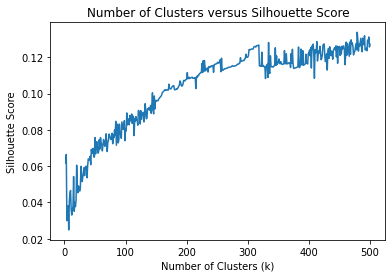

In [19]:
plt.plot(k_list,score_list)
plt.title('Number of Clusters versus Silhouette Score')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.show()

In [20]:
print('Best value for k:', best_k)
print('Best Silhouette Score:', best_score)

Best value for k: 479
Best Silhouette Score: 0.13378655856065


In [22]:
runs = 0
assignment_list = []
while runs < 10:
    km = KMeans(n_clusters = 200, max_iter = 50000, init = 'k-means++')
    cluster_assignment = km.fit(assess_vectors).labels_
    runs  += 1
    assignment_list.append(cluster_assignment)

clustering_pairs = [[a, b] for idx, a in enumerate(assignment_list) for b in assignment_list[idx + 1:]]

pair_numbers = []
for number in range(0,10):
    for another_number in range(0,10):
        if another_number > number: 
            pair_numbers.append([number+1, another_number+1])

from sklearn.metrics.cluster import adjusted_mutual_info_score

ami_score_list = []
for index in range(0, len(clustering_pairs)):
    label = 'Comparing Run ' + str(pair_numbers[index][0]) + ' and Run ' + str(pair_numbers[index][1])
    ami_score = adjusted_mutual_info_score(clustering_pairs[index][0], clustering_pairs[index][1])
    ami_score_list.append([label, ami_score])
    
import csv

with open("../../../OneDrive/SMART/Jesse_2021/StoryBoards/SMART_cluster_assignment_OLI General Chemistry I_tfidf.csv","w+") as my_csv:
    newarray = csv.writer(my_csv,delimiter=',')
    newarray.writerows(assignment_list)
    newarray.writerows(ami_score_list)